<a href="https://colab.research.google.com/github/AdvithiK/SMS-Spam-Classification/blob/main/SMSSpamClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing and Classifying SMS Spam**
This notebook explores SMS spam detection by analyzing textual characteristics of SMS messages. Our goal for this project is to identify similarities amongst SMS spam and see if we can create a classification sorting out ham and spam messages.
Using a dataset of various SMS messages (labeled ham or spam), we performed exploratory data analysis (EDA) to identify distinguishing features between ham and spam messages. After performing EDA, we conducted technique tests such as sentiment analysis, frequency analysis with bayes classifier, and more to further distinguish spam and ham attributes. Through visualizations and classification techniques, this notebook analyzes effective spam detection models.   


###Questions we have are:

*   What keywords imply an SMS message is spam?
*   Is there a sense of urgency in wording for SMS spam?
*   Can we create a classifier that sorts out ham and spam accurately?

###Dataset
The dataset we are using is a collection of SMS spam and ham messages collected.
Dataset Link:

https://archive.ics.uci.edu/dataset/228/sms+spam+collection

##Techniques we want use
**Sentiment Analysis**:
We want to extract and analyze keywords in SMS spam to understand the emotions the messages may evoke/imply.

**Frequency Analysis**:
We want to identify words that appear frequently in spam messages. This can indicate a pattern that may help our model identify spam messages.

**Word Length Analysis**:
We want to identify long texts that include links or codes because it can be an indicator of spam. Long URL’s or promotion codes can be a sign of spam as well.

**Cosine Similarity + KNN**
We want to use cosine similarity as our distance measurement in our implementation of KNN. Our model will predict whether or not certain messages are considered HAM or SPAM.

**Naive Bayes**
We want to use Naive Multinomial Bayes to identify the probabilities of words and messages to be classified as HAM or SPAM.

**Logistic Regression**
We want to classify SMS messages as spam or ham using logistic regression. By analyzing word frequency and patterns in messages, we can train the model to distinguish spam messages with high accuracy.



# **Exploratory Data Analysis (EDA)**

For data cleaning, we converted the text file into a csv file with one column being 'ham' or 'spam' and the corresponding message in the other column. Link to file: https://drive.google.com/file/d/1p0D0LiX33LYiXs2ltBfB3r6Sb2ereuor/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# loading dataset in
data = pd.read_csv('SMSSpamCollection.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: 'SMSSpamCollection.csv'

In [ ]:
# preprocessing the data

import pandas as pd
import nltk
import re

data = pd.read_csv('SMSSpamCollection.csv')
data.columns = ['labels', 'message']

def preprocess_text(text):
  # converting the letter to lowercase
  text = text.lower()

  # tokenization for words in text
  tokens = text.split()
  return tokens
  print(tokens)

# calling preprocessing function on data
data['cleaned_message'] = data['message'].apply(preprocess_text)

# creating spam subset
dataSpam = data.loc[data['labels'] == 'spam',:]

# creating ham subset
dataHam = data.loc[data['labels'] == 'ham',:]

###**Comparison of numbers being present in ham v.s. spam messages**

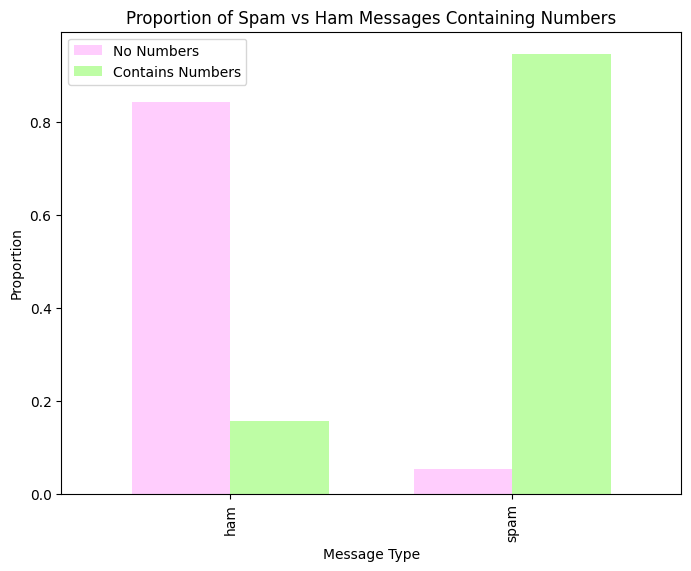

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

data = pd.read_csv('SMSSpamCollection.csv')
data.columns = ['label', 'message']

# using re.search to look for a number in text
# returns boolean value if number present or not
def contains_number(text):
    return bool(re.search(r'\d', text))

# new column with truth values for if number is present in the message
data['has_number'] = data['message'].apply(contains_number)

# normalizing so we compare proportions
total_counts = data['label'].value_counts()

number_counts = data.groupby(['label', 'has_number']).size().unstack()

# getting the proportions by dividing from total counts
normalized_counts = number_counts.div(total_counts, axis=0)

# plotting the data as a side by side bar graph
normalized_counts.plot(kind='bar', figsize=(8, 6), colormap='vanimo', width=0.7)

plt.title("Proportion of Spam vs Ham Messages Containing Numbers")
plt.xlabel("Message Type")
plt.ylabel("Proportion")
plt.legend(["No Numbers", "Contains Numbers"])
plt.show()


We performed this EDA because we notice a lot of messages regarding money in most spam messages and wanted to see if numbers could be an indicator that a message is spam or not. From the visual above, we can see that a majority of spam messages do contain numbers and that most ham messages do not contain numbers. This visual tells us that numbers are definitely an attribute in messages that can be a factor in telling whether a message is ham or spam.

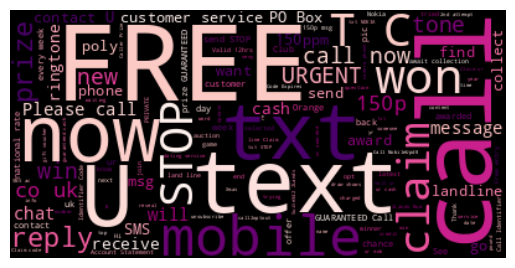

In [ ]:
# kalyani's plot : word cloud of most commonly appearing words in spam

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

spamText = " ".join(msg for msg in dataSpam.message)

spamWordCloud = WordCloud(colormap = 'RdPu').generate(spamText)
plt.imshow(spamWordCloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

The purple word cloud above shows us the most commonly appearing words in the spam messages. Some of these words include "free", "urgent", "reply", "collect", "claim", "prize", and "won". We can look for these words in future messages to indicate spam.

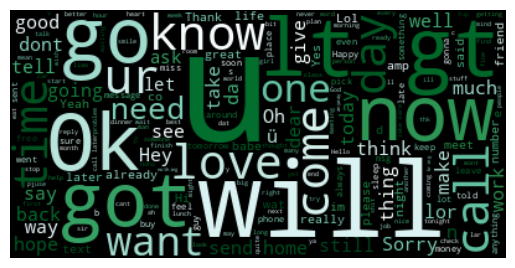

In [ ]:
# kalyani's plot : word cloud of most commonly appearing words in ham

hamText = " ".join(msg for msg in dataHam.message)

hamWordCloud = WordCloud(colormap = 'BuGn').generate(hamText)
plt.imshow(hamWordCloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

The next word cloud shows commonly appearing words in ham messages. Some of these words coincide with the common spam words, such as "call" or "now. This suggests that these overlapping words may not be strong indicators of spam or ham. Instead, we can use words that are only common in spam messages to help us identify future messages.

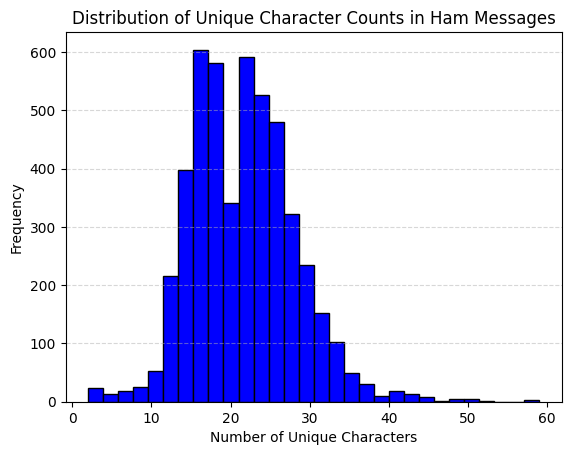

In [ ]:
# Jin's plot: distribution of unique characters in ham messages

dataSpam["Unique_Char_Count"] = dataSpam["message"].astype(str).apply(lambda x: len(set(x)))
dataHam["Unique_Char_Count"] = dataHam["message"].astype(str).apply(lambda x: len(set(x)))

# histogram for ham
plt.hist(dataHam["Unique_Char_Count"], bins=30, edgecolor='black', color="blue")
plt.xlabel("Number of Unique Characters")
plt.ylabel("Frequency")
plt.title("Distribution of Unique Character Counts in Ham Messages")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

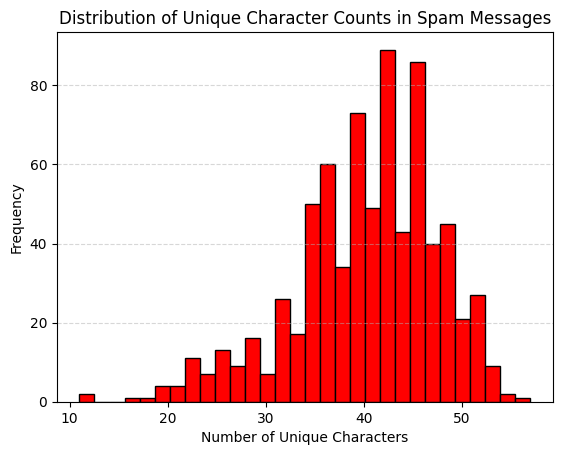

In [ ]:
# Jin's plot: distribution of unique characters in spam messages

# histogram for spam
plt.hist(dataSpam["Unique_Char_Count"], bins=30, edgecolor='black', color="red")
plt.xlabel("Number of Unique Characters")
plt.ylabel("Frequency")
plt.title("Distribution of Unique Character Counts in Spam Messages")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

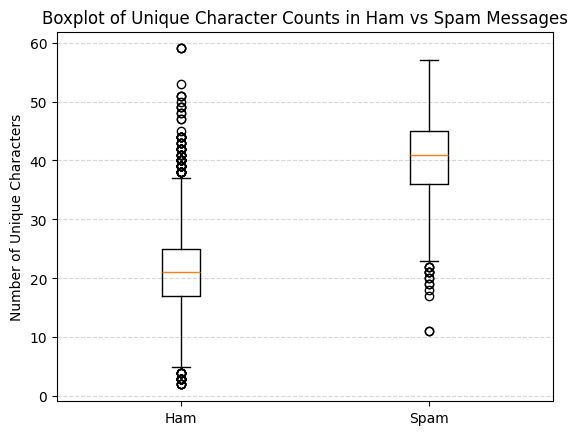

In [ ]:
# Jin's plot: boxplots of unique characters in ham and spam messages

dataSpam = dataSpam.copy()
dataHam = dataHam.copy()

dataSpam["Unique_Char_Count"] = dataSpam["message"].astype(str).apply(lambda x: len(set(x)))
dataHam["Unique_Char_Count"] = dataHam["message"].astype(str).apply(lambda x: len(set(x)))

plt.boxplot([dataHam["Unique_Char_Count"], dataSpam["Unique_Char_Count"]], tick_labels=["Ham", "Spam"])
plt.ylabel("Number of Unique Characters")
plt.title("Boxplot of Unique Character Counts in Ham vs Spam Messages")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

We performed this EDA as we wanted to see if the number of unique characters could be an indicator of weather the message was ham or spam. From the diagrams above, we can see that the majority of ham messages have around 18 to 25 unique characters in the message while the majority of spam messages have around 35 to 45. While there are overlaps, one could assume that the higher the number of unique characters means there is a higher chance of the message being spam.

# Occurance of links in Spam vs Ham messages


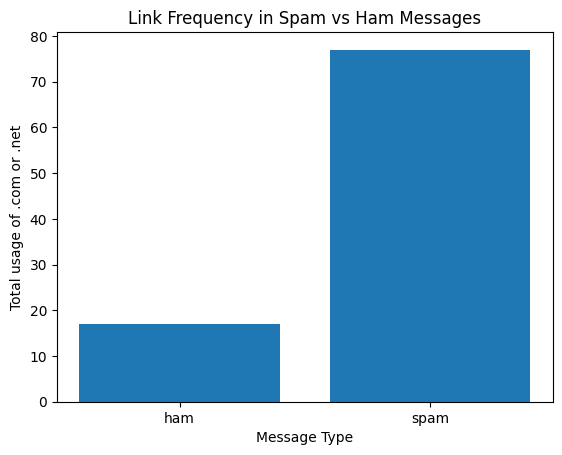

In [ ]:
# Chris' plot: usage of links ending in '.com' or '.net' in ham vs spam messages
data_df = pd.read_csv('SMSSpamCollection.csv')
data_df.columns = ['label', 'message']

# find .com or .net
data_df['netcom_count'] = data_df['message'].str.count(r'\.com|\.net')
# group by label spam or ham
group_counts = data_df.groupby('label')['netcom_count'].sum().reset_index()

# bar graph
plt.figure()
plt.bar(group_counts['label'], group_counts['netcom_count'])
plt.xlabel("Message Type")
plt.ylabel("Total usage of .com or .net")
plt.title("Link Frequency in Spam vs Ham Messages")
plt.show()


We performed this EDA because we wanted to see if it is more common for spam messages to include links to websites. From the bar chart above, we see that links are included in more spam than ham. Although only a very small portion of the dataset included links that used .com or .net, it shows that it is still more common in spam.

(I can also added an EDA for length of messages)

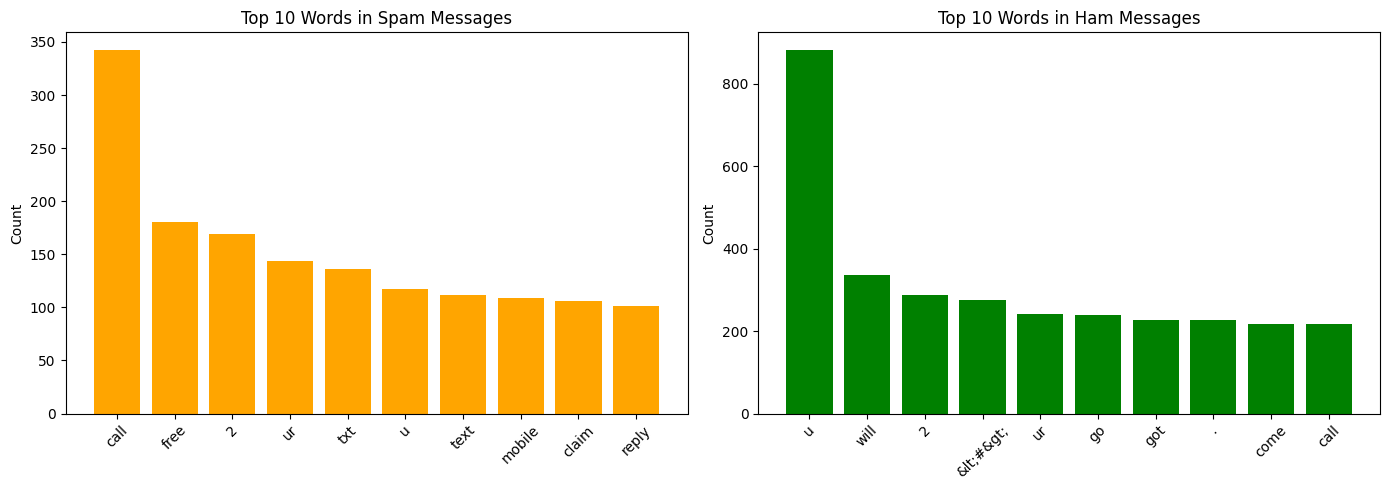

In [ ]:
#Sneha's plot: Top 10 words in Spam and Ham messages

# from wordcloud import WordCloud, STOPWORDS, ImageColorGeneratorS
from collections import Counter

stop_words = set(STOPWORDS)

dataSpam.loc[:, 'cleaned_message'] = dataSpam['cleaned_message'].apply(lambda words: [word for word in words if word not in stop_words])
dataHam.loc[:, 'cleaned_message'] = dataHam['cleaned_message'].apply(lambda words: [word for word in words if word not in stop_words])

spam_words = [word for tokens in dataSpam['cleaned_message'] for word in tokens]
ham_words = [word for tokens in dataHam['cleaned_message'] for word in tokens]

spam_word_counts = Counter(spam_words)
ham_word_counts = Counter(ham_words)

# Get top 10 words
top_spam_words = dict(spam_word_counts.most_common(10))
top_ham_words = dict(ham_word_counts.most_common(10))

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(top_spam_words.keys(), top_spam_words.values(), color='orange')
axes[0].set_title("Top 10 Words in Spam Messages")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(top_spam_words)))
axes[0].set_xticklabels(list(top_spam_words.keys()), rotation=45)

axes[1].bar(top_ham_words.keys(), top_ham_words.values(), color='green')
axes[1].set_title("Top 10 Words in Ham Messages")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(len(top_ham_words)))
axes[1].set_xticklabels(list(top_ham_words.keys()), rotation=45)

plt.tight_layout()
plt.show()

The left bar chart shows the most frequent words like "call", "free", "now", "txt", and "claim", which aligns with promotional or urgent texting often seen in spam messages. The right bar chart shows common words such as "u", "im", "will", "now", and "itgt", which reflects a more casual, conversational language. These key differences in words allow us to detect spam messages.

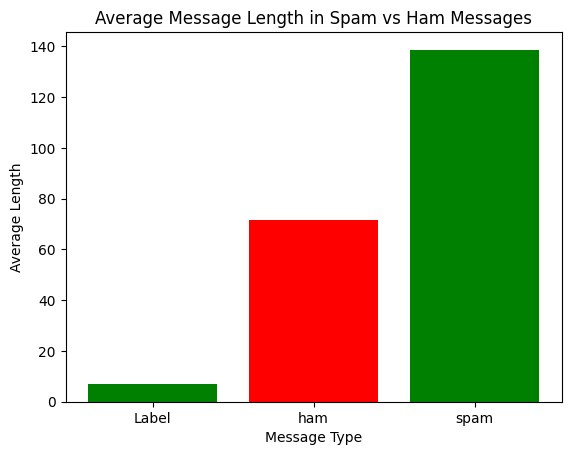

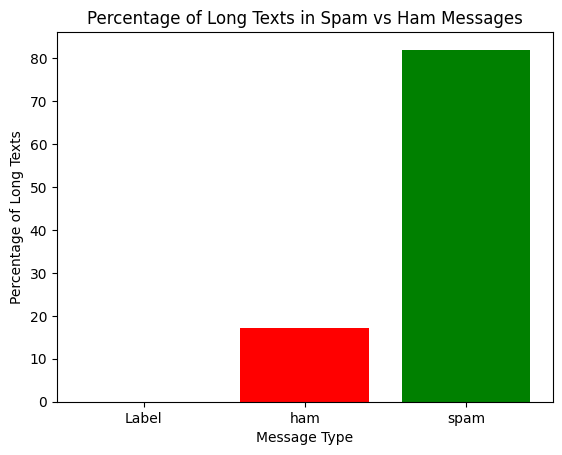

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_csv('SMSSpamCollection.csv', header=None)

# note to everyone DO NOT DO sep='\t' !!!
#data_df = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None)
#data_df
data_df.columns = ['label', 'message']

data_df['message_length'] = data_df['message'].apply(len)

data_df['is_long'] = data_df['message_length'] > 120

avg_length = data_df.groupby('label')['message_length'].mean()

long_text_counts = data_df.groupby('label')['is_long'].mean() * 100

plt.bar(avg_length.index, avg_length.values, color=['green', 'red'])
plt.title('Average Message Length in Spam vs Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Average Length')
plt.show()

plt.bar(long_text_counts.index, long_text_counts.values, color=['green', 'red'])
plt.title('Percentage of Long Texts in Spam vs Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Percentage of Long Texts')
plt.show()



These bar charts shows the average length of of a message in spam compared to ham and the percent of long texts in spam compared to ham. The differences in length of the text can help us detect spam messages

# Techniques

## Sentiment Analysis

In [ ]:
import pandas as pd
import re

data = pd.read_csv('SMSSpamCollection.csv')
data.columns = ['labels', 'message']

# list of words to determine postive or negative sentiment
positive = ['good', 'great', 'amazing', 'love', 'happy', 'excellent', 'awesome', 'positive','best']
negative = ['bad', 'terrible', 'awful', 'hate', 'sad', 'poor', 'negative', 'worst']

#default score of 0, if a text is positive >= 1, if a text is negative <= -1
def sentiment_analysis(text):
    score = 0
    words = text.split()
    for word in words:
        if word in positive:
            score += 1
        elif word in negative:
            score -= 1
    return score

# new column for sentiment score
data['sentiment_score'] = data['message'].apply(sentiment_analysis)

data[['labels', 'message', 'sentiment_score']]




,labels,message,sentiment_score
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,0
5570,ham,Will ü b going to esplanade fr home?,0
5571,ham,"Pity, * was in mood for that. So...any other s...",0
5572,ham,The guy did some bitching but I acted like i'd...,0


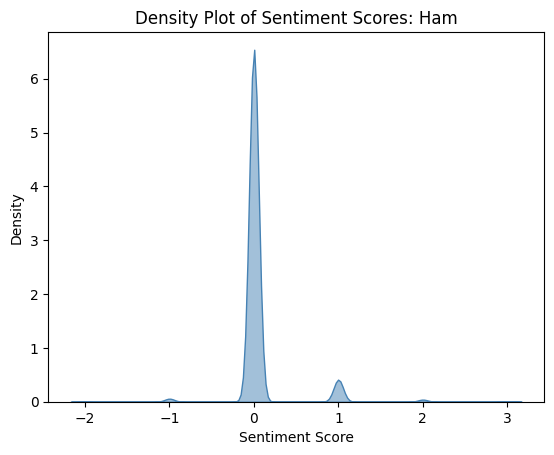

In [ ]:
#density plot for ham messages based on sentiment score

sns.kdeplot(data=data[data['labels'] == 'ham']['sentiment_score'],
            label='Ham', fill=True, color='#4682B4', alpha=0.5)

plt.title('Density Plot of Sentiment Scores: Ham')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

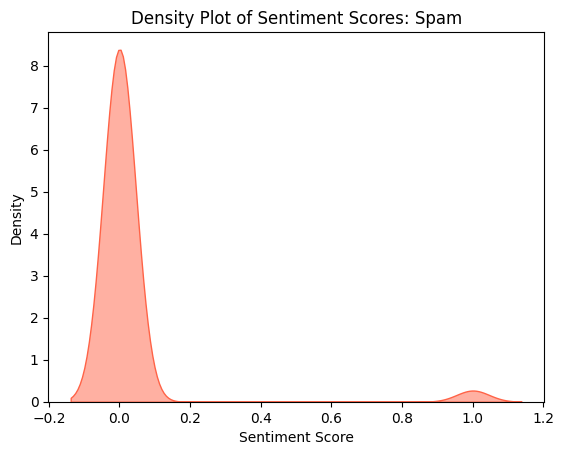

In [ ]:
#density plot for spam messages based on sentiment score

sns.kdeplot(data=data[data['labels'] == 'spam']['sentiment_score'],
            label='Spam', fill=True, color='#FF6347', alpha=0.5)

plt.title('Density Plot of Sentiment Scores: Spam')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

In [ ]:
import pandas as pd
import re

data = pd.read_csv('SMSSpamCollection.csv')
data.columns = ['labels', 'message']

# list of words with postive and negative words found in Word Cloud EDA
positive_add = ['good', 'great', 'amazing', 'love', 'happy', 'excellent', 'awesome', 'positive', 'ok', 'free','won','win','claim','dear','hope']
negative_add = ['bad', 'terrible', 'awful', 'hate', 'sad', 'poor', 'negative', 'worst','urgent', 'no','stop']

# default score of 0, if a text is positive >= 1, if a text is negative <= -1
def sentiment_analysis(text):
    score = 0
    words = text.split()
    for word in words:
        if word in positive_add:
            score += 1
        elif word in negative_add:
            score -= 1
    return score

# new column for sentiment score
data['sentiment_score'] = data['message'].apply(sentiment_analysis)

data[['labels', 'message', 'sentiment_score']]

,labels,message,sentiment_score
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,2
5570,ham,Will ü b going to esplanade fr home?,0
5571,ham,"Pity, * was in mood for that. So...any other s...",0
5572,ham,The guy did some bitching but I acted like i'd...,1


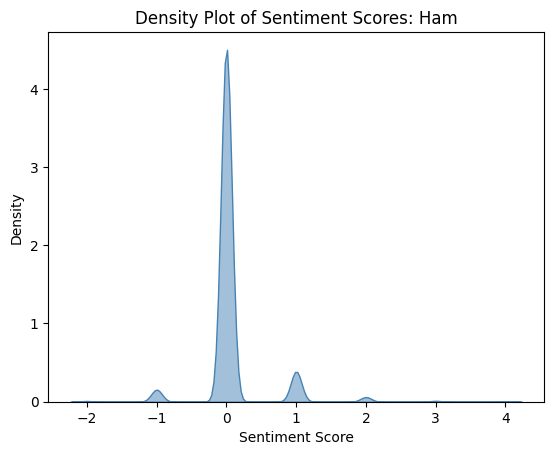

In [ ]:
# density plot for ham messages based on sentiment score

sns.kdeplot(data=data[data['labels'] == 'ham']['sentiment_score'],
            label='Ham', fill=True, color='#4682B4', alpha=0.5)

plt.title('Density Plot of Sentiment Scores: Ham')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

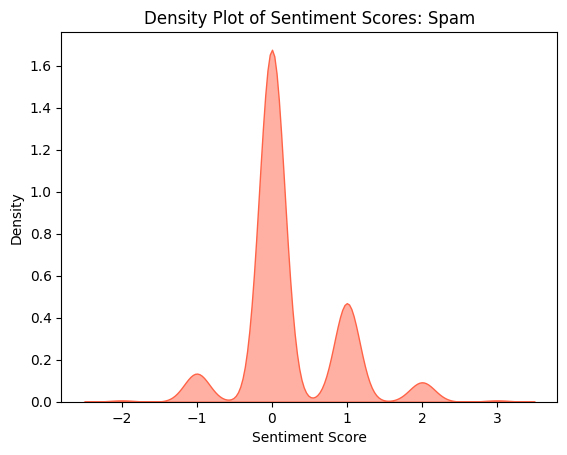

In [ ]:
# density plot for spam messages based on sentiment score

sns.kdeplot(data=data[data['labels'] == 'spam']['sentiment_score'],
            label='Spam', fill=True, color='#FF6347', alpha=0.5)

plt.title('Density Plot of Sentiment Scores: Spam')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

From the results of calculating the sentiment for spam and ham messages, it's interesting to see that both spam and ham have a similar distribution of postive, negative, and even neutral messages. It is noteable that ham messages are more positive because the sentiment score goes up to 3 whereas for spam messages, the sentiment goes up to only 2. However, this statement can be countered by the fact that ham has messages with a negative sentiment score that go down to -2 whereas spam messages only go down to -1. From the results, we can say that sentiment may not be a great classifying factor on whether a message is spam or ham.

## Cosine Similarity + KNN

In [ ]:
# Train and Test KNN model
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


spamham_df = pd.read_csv('SMSSpamCollection.csv')

# using TFIDF to vectorize the data
vectorizer = TfidfVectorizer()

# vectorize the messages
X = vectorizer.fit_transform(spamham_df['Message'])
Y = spamham_df['Label']

# Split the data into training and testing sets
# I used train_test_split to split the data between training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# I tried using different values of n and 7 gave me the best results
# Using cosine as my distance metric
model = KNeighborsClassifier(n_neighbors=7, metric='cosine', algorithm='auto')

# Train the model
model.fit(X_train, Y_train)

# Predict on the test data
Y_predict = model.predict(X_test)

# get report for how well the model does
report = classification_report(Y_test, Y_predict)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



From the classification report we can see that this model does pretty well on predicting ham and spam messages. For ham messages we have an f1-score of 0.99 and for spam messages the score is 0.91. The model correctly predicted ham messages almost every time as we can see from the precision being 0.98. Its recall is 1.00 meaning it was able to correctly identifies ham messages every time. As for spam we see something similar for precision, however, the recall is much lower at 0.84. This means that about 16% of spam messages are missed and being classified as ham. This is not entirely bad because it is much better to missclassify spam as ham than the other way around especially if we were to use this model in sorting messages into trash or the inbox.

In [ ]:
# Example testing a random message
spam_message = "You have an outstanding tax refund of $2,560. Follow these instructions to claim your refund 1. Go to www.refund.com 2. press claim refund"
spam_message_tfidf = vectorizer.transform([spam_message])
prediction = model.predict(spam_message_tfidf)
print("The spam message is classified as:", prediction[0])

spam2_message = "Check this website out for free bitcoins http://freecoin.com"
spam2_message_tfidf = vectorizer.transform([spam2_message])
prediction = model.predict(spam2_message_tfidf)
print("The spam message is classified as:", prediction[0])

ham_message = "Hey, are we still getting dinner tonight?"
ham_message_tfidf = vectorizer.transform([ham_message])
prediction = model.predict(ham_message_tfidf)
print("The ham message is classified as:", prediction[0])


The spam message is classified as: ham
The spam message is classified as: spam
The ham message is classified as: ham


Here is an example of two spam messages and 1 ham message that I want to run the model on. The model mistakenly classified the first message as ham but correctly classified the second message. It also correctly identified the ham message.

## Frequency Analysis with Bayes Classifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


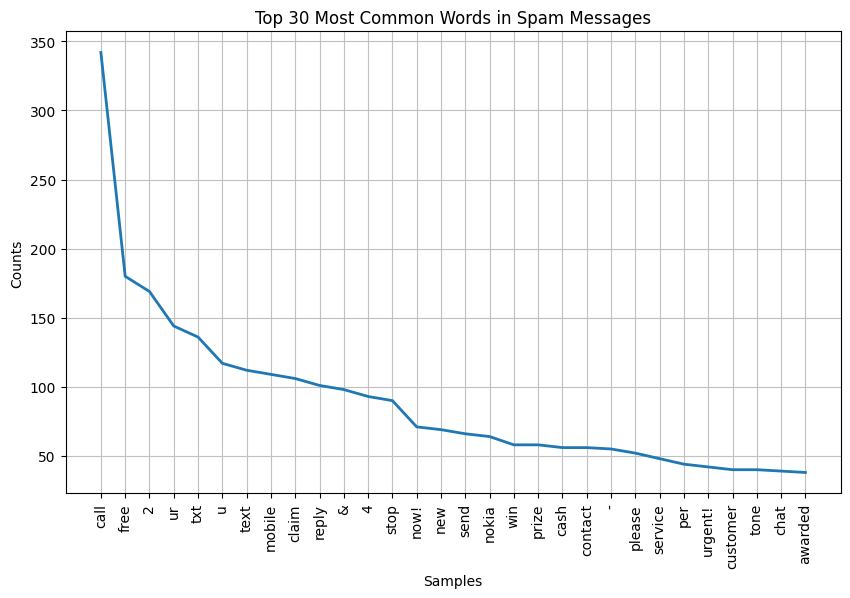

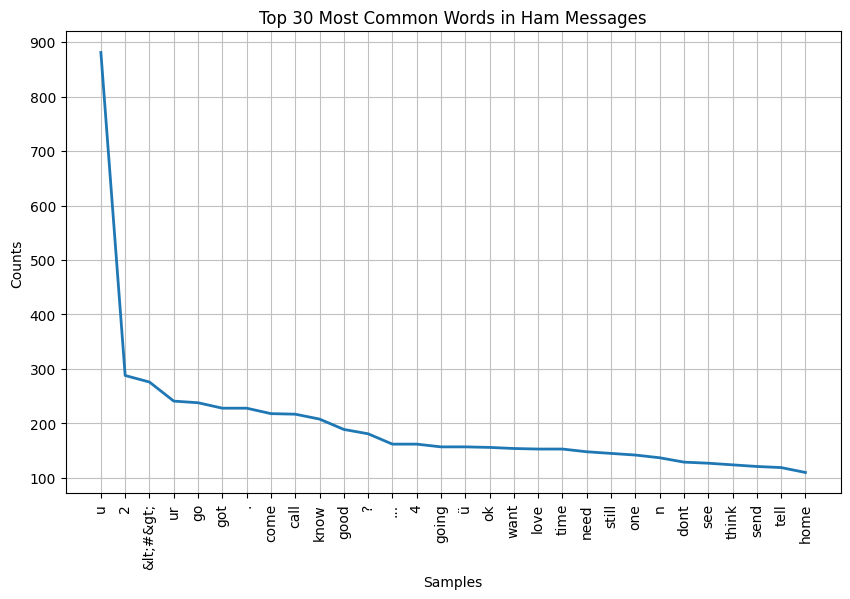

In [ ]:
import pandas as pd
from nltk.probability import FreqDist
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

# showing the most frequent words in spam and ham messages by count

spamTokens = [token for msg in dataSpam['cleaned_message'] for token in msg if token not in stopWords]
hamTokens = [token for msg in dataHam['cleaned_message'] for token in msg if token not in stopWords]

spamFreqDist = FreqDist(spamTokens)
hamFreqDist = FreqDist(hamTokens)

plt.figure(figsize = (10, 6))
spamFreqDist.plot(30, title = 'Top 30 Most Common Words in Spam Messages', cumulative = False)
plt.show()

plt.figure(figsize = (10, 6))
hamFreqDist.plot(30, title = 'Top 30 Most Common Words in Ham Messages', cumulative = False)
plt.show()

We performed frequency analysis on spam and ham messages. Similar to the graphs from our EDA, we identified the most common words in spam and ham messages. This is shown in the two frequency charts. Since a lot of these common words are unique to either spam or ham, we want to create a classifier that uses these word frequencies for classification.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# implementing naive bayes classifier using CountVectorizer

data['cleaned_message'] = data['message'].apply(preprocess_text)
data['cleaned_message'] = data['cleaned_message'].astype(str)

X = data['cleaned_message']
y = data['labels']

vectorizer = CountVectorizer()
X_vectors = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size = 0.2, random_state = 42)

bayesClassifier = MultinomialNB()
bayesClassifier.fit(X_train, y_train)

y_pred = bayesClassifier.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy:  0.9848
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       954
        spam       0.94      0.96      0.95       161

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In order to classify spam and ham messages using frequency analysis, we use a CountVectorizer and implement a Multinomial Naive Bayes classifier. This classifier calculates the likelihood of a word, such as "free" or "now", being categorized as either spam or ham. Based on the training data, the model goes through the test data and looks up the probability of the current word being spam or ham. Then, individual probabilities for all words in a message are multiplied to get an overall probability. This overall probability is used to determine the class "spam" or "ham" for the message.

Looking at the model results, we see that the model is quite precise for both ham and spam messages. There is a larger sample size for ham compared to spam messages. However, the model actually shows a higher precision and recall for ham messages compared to spam. This suggests that the accuracy and precision for classifying spam messages may also increase if we train the model with a larger sample size like ham messages. The f1 score of the model is high for both spam and ham messages, which is ideal. This suggests that Multinomial Bayes, using frequency analysis and word counts, is a useful classifier method for our data.

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('SMSSpamCollection.csv')
data.columns = ['labels', 'message']
data['cleaned_message'] = data['message'].apply(preprocess_text)

data['cleaned_message'] = data['cleaned_message'].apply(lambda words: ' '.join(words))

# Converting text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['cleaned_message'])
y = data['labels'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9605

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       954
           1       0.98      0.74      0.84       161

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



We identifed patterns in SMS spam messages to build a classifier to distinguish spam from ham. We used TF-IDF vectorization, analyzing the words and trained a logistic regression model. Some of the keywords or phrases we identified were "free" ,"win", and "urgent" that would indicate a high likelihood of spam. According to the results, we were able to achieve 96% accuracy, meaning the classifier was mostly correct in identifying spam or ham. The precision was 0.98 meaning when we predicted messages to be spam, they were right. The recall was 0.74 for spam and 1.0 for ham, meaning all ham messages were correctly classified. Our overall F1 score is 0.91 meaning it is balanced and our classifier works correctly.

# Conclusions



Through our EDA and frequency analysis, we discovered that spam and ham messages have different common words. Particularly, we noticed that spam messages contain buzzwords related to prizes or winning. For example, common spam words were free, claim, reply, now, send, and prize. These words don't commonly show up in ham messages. We were able to use these unique words in our Bayes model, which used the probabilities of these common words to classify spam vs ham messages. This resulted in high recall and precision, and our Naive Bayes model was quite a reliable classifier with about 98% accuracy. Our Bag of Words analysis further revealed that "call" appeared nearly 350 times in spam messages and "u" appeared 1000 times in ham messages. This shows that spam messages push receivers to take actions, whereas ham messages are more conversational. The EDA on word length analysis also helps us detects a trend in spam messages in that most messages that are spam have an average of 140 characters, meanwhile ham messages are only about 70 characters. Along with word length, we also notice that there was a higher distribution of unique character counts. Spam messages tend to have character counts around 35-45, while ham messages have less, around 18-25. Our EDA on the frequency of links also showed us that it is more common for spam messages to have links compared ham messages. This also helped our models in classifying messages as spam when links were found.

We also wanted to explore whether spam messages had a sense of urgency. To do so we took a collection of generic words with positive and negative sentiment and as well as another analysis using words we found in our EDA. The sentiment analysis on the data with general positive and negative words shows that both ham and spam message are largely neutral. When we did sentiment analysis using words from our EDA, spam messages have more positive sentiment compared to negative sentiment while ham message remained similar and stayed neutral. This shows that the sense of urgency could have more of a positive sentiment compared to a negative sentiment. Prior to doing this analysis, we believed that a sense of urgency could only have negative sentiment related to scams and loosing money, however sense of urgency can also be created by winning money and claiming prizes immediately as well. From this analysis, we could draw a conclusion that the words spam and ham messages use definitely play a factor on detecting the difference between the two types.

Finally, we also wanted to know whether or not we could create a classifier that can sort spam and ham messages accurately based on similarity. We did this by making a classifier using K-Nearest Neighbors. For KNN, we used cosine similarity as the distance metric to compare how a message is with the trained data. From the classification report, we saw that the model had a really high f1 score for classifying ham (99%) and a little lower for spam (91%), making our KNN model a good classifier in sorting ham and spam messages. Initially, we considered using Bag of Words as one of our techniques, but we found out that it does not consider the importance of words or their frequency in regards to the whole dataset. To improve accuracy, we opted for logistic regression to classify messages as spam or ham by using TF-IDF. We trained the classifier into training and test data with a 80/20 split. The model had 98% precision for detecting spam, 74% recall, and 96% accuracy overall. The conclusion we can draw is that our classifiers were successful in detecting spam vs ham messages overall.



# **Contributions**


| **Group Member** | **Contribution** |
|------------------|------------------|
|Taha| Worked on word length analysis classifying messages as spam or ham based on length of text. Worked on logistic regression to build a classifier to distinguish ham vs spam using TF-IDF vectorization.|
|Chris| Worked on KNN model using cosine similarity as the distance metric and TF-IDF to vectorize the data to classify SPAM and HAM messages. Also created the visualization for link frequency within the dataset of HAM and SPAM messages.|
|Jonathan|Worked on distribution of unique character counts in both ham and spam messages. Implemented two histograms and a boxplot to visualize the distribution. Implemented introduction.|
|Advithi| Worked on the Introduction, Hypotheses, cleaning and preprocessing the data. Also worked on EDA for finding proportion of numbers among ham and spam messages. Worked on the Sentiment Analysis for Ham and Spam messages.|
|Kalyani| Worked on EDA for wordclouds of spam vs ham words. Worked on frequency analysis and created charts. Implemented multinomial naive bayes classifier that uses word count frequencies.
|Sneha| Worked on bag of words that displays two charts that show the most common words in spam and ham messages. Worked on on logistic regression using TF-IDF vectorization.